In [2]:
import pretty_midi
import numpy as np
from matplotlib import pyplot as plt

In [15]:
gh = pretty_midi.PrettyMIDI("./processed/midi/Heart - Barracuda.mid")
p2p = pretty_midi.PrettyMIDI("./clonehero/Heart - Barracuda/notes.mid")

In [16]:
end = gh.get_end_time()

In [17]:
intervals = np.linspace(0, end, 100)

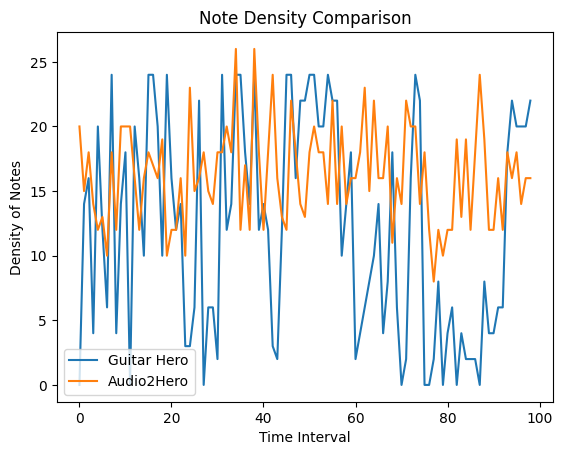

In [20]:
data_gh = []
data_p2p = []
for i in range(len(intervals)-1):
    start = intervals[i]
    end = intervals[i+1]
    
    in_interval = len([note for note in gh.instruments[0].notes if note.start >= start and note.end <= end])
    data_gh.append(in_interval)
    in_interval = len([note for note in p2p.instruments[0].notes if note.start >= start and note.end <= end])
    data_p2p.append(in_interval)

plt.plot(data_gh)
plt.plot(data_p2p)
plt.title("Note Density Comparison")
plt.xlabel("Time Interval")
plt.ylabel("Density of Notes")
plt.legend(["Guitar Hero", "Audio2Hero"])
plt.show()

In [32]:

def time_difference(song1,song2):
    track1 = song1 if song1.get_end_time() < song2.get_end_time() else song2
    track2 = song2 if song1.get_end_time() < song2.get_end_time() else song1
    dist_sum = 0
    for note in track1.instruments[0].notes:
        closest = min(track2.instruments[0].notes, key=lambda x: abs(x.start - note.start))
        dist = abs(closest.start - note.start)
        dist_sum += dist
    return dist_sum / len(song1.instruments[0].notes)

# print(time_difference(gh,p2p))

0.24096063816127433
Rage Against The Machine - Bulls On Parade Rage Against The Machine - Bulls On Parade 0.6185028704506025
Rage Against The Machine - Bulls On Parade The Sex Pistols - Anarchy In The UK 0.23988982163489483
Rage Against The Machine - Bulls On Parade ZZ Top - La Grange 0.17387203928365239
Rage Against The Machine - Bulls On Parade Bloc Party - Helicopter 0.2792454145002942
Rage Against The Machine - Bulls On Parade Santana - Black Magic Woman 0.13888208586077366
Rage Against The Machine - Bulls On Parade Scorpions - Rock You Like A Hurricane 0.11951233932698133
Rage Against The Machine - Bulls On Parade Tenacious D - The Metal 0.15371800982091458
Rage Against The Machine - Bulls On Parade Pat Benatar - Hit Me with Your Best Shot 0.22885342648757692
Rage Against The Machine - Bulls On Parade The Killers - When You Were Young 0.21300566868861834
Rage Against The Machine - Bulls On Parade Eric Johnson - Cliffs Of Dover 0.13955280545927118
Rage Against The Machine - Bulls O

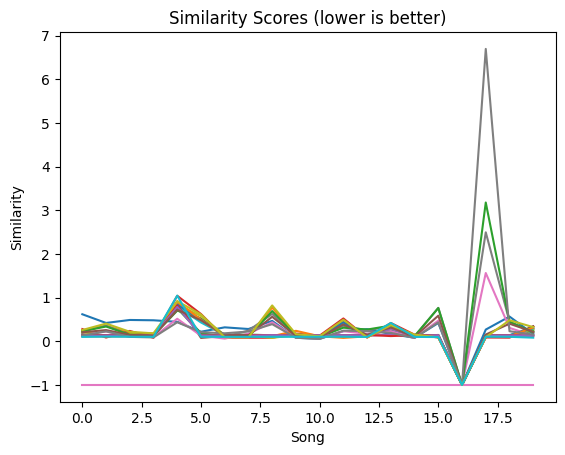

In [61]:
import os
original_file_path = "./processed/midi/Heart - Barracuda.mid"
original_file_path_2 = "./clonehero/ZZ Top - La Grange/notes.mid"
song1 = pretty_midi.PrettyMIDI(original_file_path)
song2 = pretty_midi.PrettyMIDI(original_file_path_2)
similarity = time_difference(song1,song2)
print(similarity)

names = [i for i in os.listdir("./clonehero") if i != ".DS_Store"][0:20]
similarities = []
for name1 in names:
  sim = []
  for name2 in names:
      if name1 == ".DS_Store" or name2 == ".DS_Store":
          continue
      # original_file_path = f"./processed/midi/{name}.mid"
      original_file_path = f"./processed/midi/{name1}.mid"
      original_file_path_2 = f"./clonehero/{name2}/notes.mid"
      try:
        song1 = pretty_midi.PrettyMIDI(original_file_path)
        song2 = pretty_midi.PrettyMIDI(original_file_path_2)
        similarity = time_difference(song1,song2)
        print(name1, name2, similarity)
        sim.append(similarity)
      except:
        sim.append(-1)
        continue
  similarities.append(sim)

plt.plot(similarities)
plt.title("Similarity Scores (lower is better)")
plt.xlabel("Song")
plt.ylabel("Similarity")
plt.show()


In [63]:
cm = np.array(similarities)
cm = cm[cm!=-1]
cm[cm>1] = -0.001
cm = cm.reshape((19,19))

Text(0, 1, 'r-squared = -0.251')

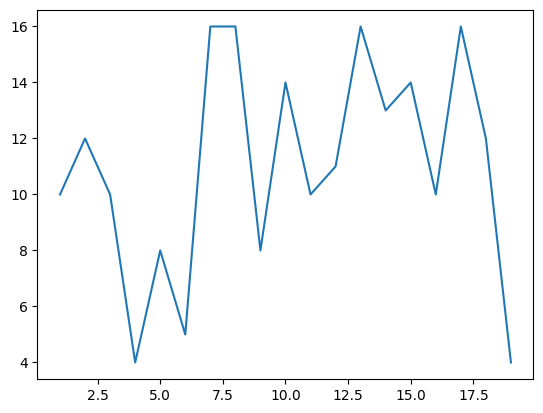

In [70]:
from sklearn.metrics import r2_score
x = range(1,len(cm)+1)
y = np.argmin(cm,axis=0)

a, b = np.polyfit(x, y, 1)
plt.plot(x,y)
plt.plot(x, a*np.array(x)+b)
plt.annotate("r-squared = {:.3f}".format(r2_score(range(1,len(cm)+1), np.argmin(cm,axis=0))), (0, 1))

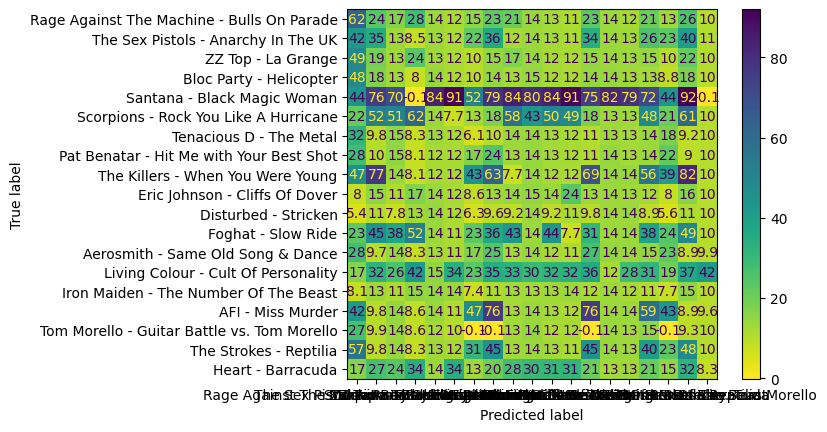

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm*100,display_labels=[name for name in names if "Slash" not in name])
disp.plot(cmap='viridis_r')
plt.show()